# MOVIE ANALYSIS
### by DANIEL KIMUTAI
## Business Understanding
#### Most big companies are creating original video content ,microsoft wants to jump in on the fun.Microsoft have decided to create a new movie studio and since they don’t anything about movies ,i have been tasked to explore what types of movies are currently doing the best at the box office and come up with insights that will help them get into the industry.In order to come up with best insights .In order to assist them to achieve this goal and make successful movies, I looked at the highly performing movies  based on ratings,production budget and  gross value.I formulated a few questions that will help me come up with clear insights
 #### a)What type of movie genre is currently performing well based on its rating
#### b).Does runtime affect the ratings /is there any relationship between runtime and the ratings?
#### c). Which type of movies have the highest total gross value
 #### d).Which genre has the highest production budget and is there a relationship between the production budget and the total gross
#### e). Which is the best month to release  a movie in order for it to sale?

## Data Understanding
#### In order to get clear insights based on the questions above i collected  my information from two datasets.
### These datasets are
  ### im.db.zip- This is data  is  contained in a Zipped SQL data base and contains different tables of movie informatiom
  ### bom.movie_gross.csv.gz-This is a csv file,where each record represents,movvie,the release data,domestic gross,production_budget,worldwide gross of each movie.From this dataset I selected the following columns:
#### movie  represents various types of movies
#### release date- the date where each movie was  released
#### domestic gross-local revenue based on the movie locality
#### worldwide gross- international revnue  of the movie
#### production budget - estimated cost of producing the movie

## Data Preparation and Data Cleaning
### 1.Loading the Data with Pandas and SQL
#### I created two dataframes ,imdb_df through SQL and Budgets_df through pandas.Thes
### 2.Perfoming Data cleaning  on imdb_df to my first two questions
#### I selected the main columns that i will work on,then  i checked for missing Values and duplicates
### 3.Perfoming Data cleaning on   Budgets_df and merging it to imdb_df
#### I cleaned my dataset and I then merged the two data sets to answer my last two questions.



## importing various libraries

In [21]:
#importing various libraries


import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
conn = sqlite3.connect('im.db')
cur = conn.cursor()

## Loading  Data using SQL

In [22]:
#loading im.db using sql
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

table_names = cur.fetchall()
table_names


[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

## Imdb dataset

In [23]:
# imdb data set
imdb_df=pd.read_sql("""
SELECT *
FROM movie_basics 
JOIN movie_ratings 
USING (movie_id)
ORDER BY averagerating DESC 


""",conn)
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
1,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5
2,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5
3,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
4,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6
...,...,...,...,...,...,...,...,...
73851,tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64.0,Drama,1.0,5
73852,tt8654080,Overdose of Gore: Crime born Crime,Overdose of Gore: Crime born Crime,2015,46.0,Horror,1.0,21
73853,tt9005484,Roofied: The Lethal Dose,Roofied: The Lethal Dose,2019,NaN,Drama,1.0,112
73854,tt9352262,The Defender,The Defender,2018,88.0,Drama,1.0,16


## 2.Perfoming Data cleaning  on imdb_df to my first two questions

### Identifying Missing Values 

In [24]:
#checking what is contained in our dataframe
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


## Cleaning Missing Values and Selecting Columns


In [25]:
#selecting  the columns that i will work with
# remobving the missing Values
imdb_df=pd.read_sql("""
SELECT original_title,
       start_year,
       runtime_minutes,
       genres,
       averagerating

FROM movie_basics 
JOIN movie_ratings 
USING (movie_id)

WHERE runtime_minutes IS NOT NULL
AND genres  IS NOT NULL
ORDER BY averagerating  DESC






""",conn)
imdb_df

,original_title,start_year,runtime_minutes,genres,averagerating
0,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0
1,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0
2,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0
3,Hercule contre Hermès,2012,72.0,Documentary,10.0
4,I Was Born Yesterday!,2015,31.0,Documentary,10.0
...,...,...,...,...,...
65715,Pup Scouts,2018,72.0,Animation,1.0
65716,La Scelta Impossibile,2018,64.0,Drama,1.0
65717,Overdose of Gore: Crime born Crime,2015,46.0,Horror,1.0
65718,The Defender,2018,88.0,Drama,1.0


## Identifying and Handling Duplicate Values

In [26]:
#checking for duplicates
imdb_df.duplicated().sum()

1

In [27]:
#dropping the duplicates
imdb_df.drop_duplicates(inplace=True)

In [28]:
#checking if the duplicates have been dropped
imdb_df.duplicated().sum()

0

In [29]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65719 entries, 0 to 65719
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   65719 non-null  object 
 1   start_year       65719 non-null  int64  
 2   runtime_minutes  65719 non-null  float64
 3   genres           65719 non-null  object 
 4   averagerating    65719 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.0+ MB


In [30]:
#checking the value counts of genres among the imdb dataset
value_counts=imdb_df['genres'].value_counts()
value_counts

Drama                            10189
Documentary                       9148
Comedy                            4604
Comedy,Drama                      2451
Horror                            2232
                                 ...  
Action,Musical,Romance               1
Animation,Documentary,Mystery        1
Action,Mystery,Western               1
Crime,Musical,Thriller               1
Comedy,Family,Thriller               1
Name: genres, Length: 906, dtype: int64

## Data analysis on the Imdbd dataset
### I used data visualization ,by using the bargraph and scatter plot  to  bring out clear insights to my questions




 ### a)What type of movie genre is currently performing well based on its rating


In [31]:
#top 25 movies based on average rating
imdb_50_df=imdb_df.head(50)


In [32]:
#checking the value counts of genres among the top 25 movies
imdb_50_counts=imdb_50_df['genres'].value_counts()
imdb_50_counts

Documentary                        29
Drama                               2
Biography,Documentary,Drama         2
Comedy,Drama                        2
Comedy,Documentary                  1
Documentary,War                     1
Drama,Sport                         1
Documentary,History                 1
Documentary,Music                   1
Action                              1
Adventure,Comedy                    1
Adventure,Biography,Documentary     1
Crime,Documentary                   1
Documentary,Drama,Sport             1
Animation,Documentary,Family        1
Biography,Drama,History             1
Biography,Documentary,Music         1
Documentary,Drama,Music             1
Documentary,Family,Romance          1
Name: genres, dtype: int64

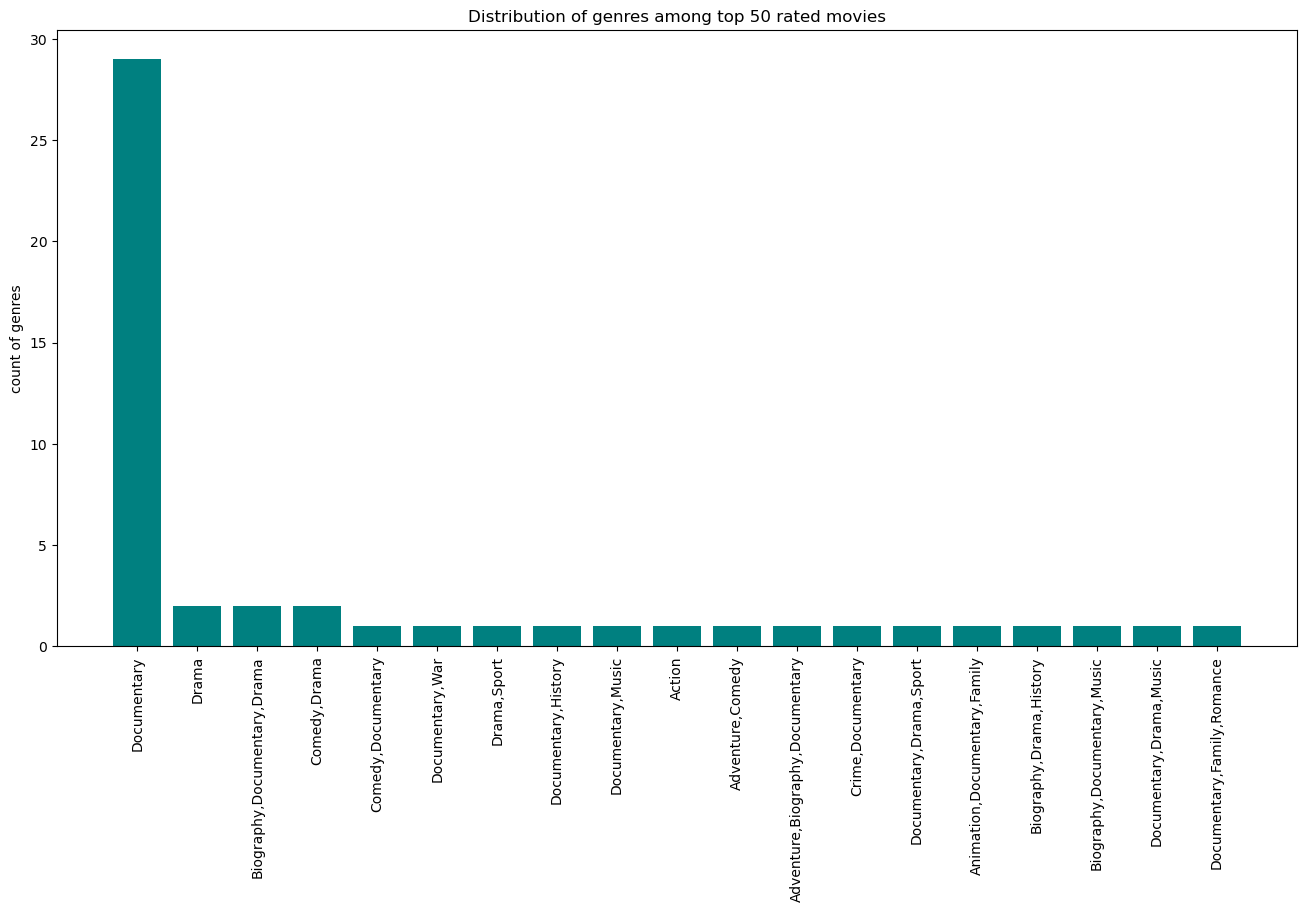

In [33]:
#data visualisation of the top_25_movies
fig,ax = plt.subplots(figsize=(16,8))
plt.style.use('default')
x=imdb_50_counts.index
y=imdb_50_counts.values
#using a bargraph
ax.bar(x,y ,color='teal')
#customizing the bar graph
ax.set_title('Distribution of genres among top 50 rated movies')
ax.set_ylabel('count of genres')
ax.tick_params(axis="x", labelrotation=90)




##### According to our data above , we can see that the distribution of genre based on the the top 50 movies based on the top ratings  shows that documentary is the nost popular type of genre with the high ratings and most liked by people.


### b)Does runtime affect the ratings /is there any relationship between runtime and the ratings?

Text(0.5, 1.0, 'Relationship between averagerating and runtime_minutes')

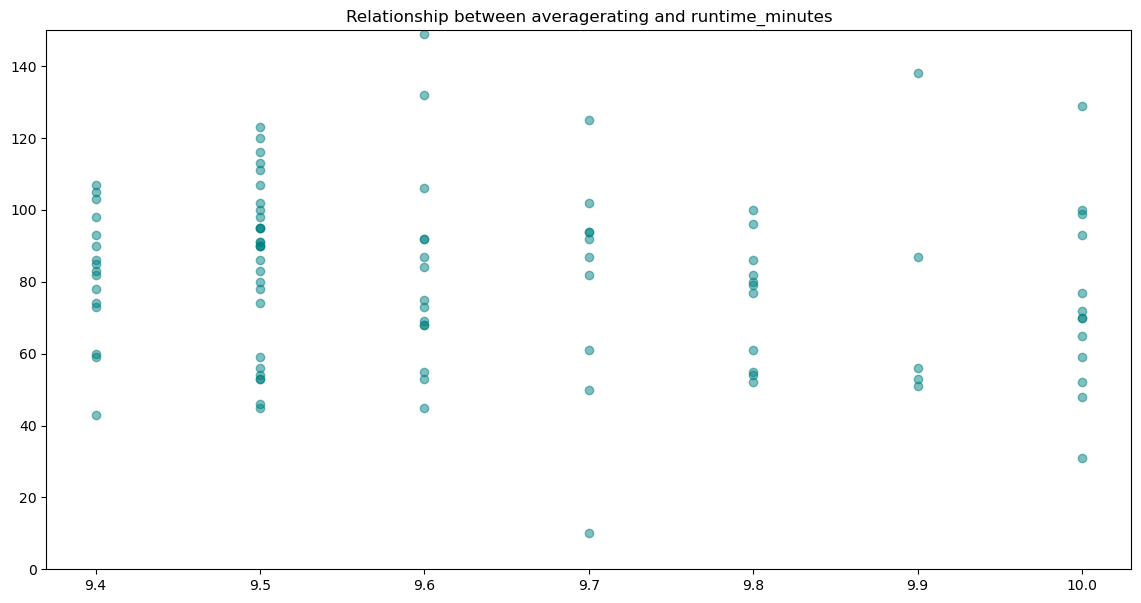

In [34]:
#data visualisation of the relationship betwen averagerating and runtime minutes
fig,ax = plt.subplots(figsize=(14,7))
plt.style.use('default')
x=imdb_df['averagerating'].head(100)
y=imdb_df['runtime_minutes'].head(100)
ax.scatter(x,y ,color='teal',alpha=0.5)
#customizing the scatter plot
ax.set_ylim(0,150)
ax.set_title('Relationship between averagerating and runtime_minutes')
#ax.set_ylabel('count of genres')ated mo
#ax.tick_params(axis="x", labelrotation=45)

In [35]:
# noclear relationship
x.corr(y)

-0.1426916821752259

#### From our scatter plot above we can see that there is no clear relationship between the average rating and the movie runttime ,hence concluding that  the running time of a movie does not necessarily affects its average rating

## 3.Perfoming Data cleaning on   Budgets_df and aggregating it to imdb_df

# Movie budgets dataset


## Loading the data

In [36]:
#loading_movie_budgets
budgets_df=pd.read_csv('tn.movie_budgets.csv')
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [37]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Identifying and handling duplicates

In [38]:
#checking for duplicates
budgets_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

## Converting production_budget,domestic_gross,worldwide_gross into integers

In [39]:
#converting production_budget,domestic_gross,worldwide_gross into integers
#stripping the dollarsigns and columns
budgets_df['production_budget']=budgets_df['production_budget'].str.strip('$,')
budgets_df['domestic_gross']=budgets_df['domestic_gross'].str.strip('$,')
budgets_df['worldwide_gross']=budgets_df['worldwide_gross'].str.strip('$,')
#replacing them 
budgets_df['production_budget']=budgets_df['production_budget'].str.replace(',',  '')
budgets_df['domestic_gross']=budgets_df['domestic_gross'].str.replace(',' , '')
budgets_df['worldwide_gross']=budgets_df['worldwide_gross'].str.replace(',',  '')


In [40]:
#converting them into integers
budgets_df['production_budget']=budgets_df['production_budget'].map(int)
budgets_df['domestic_gross']=budgets_df['domestic_gross'].map(int)
budgets_df['worldwide_gross']=budgets_df['worldwide_gross'].map(int)



In [41]:
#checking if the changes have been made
budgets_df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [42]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


## Merging the data sets

In [43]:
#cleaned data_set
budgets_cleaned_df=budgets_df
budgets_cleaned_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [44]:
#changing the title to movie in order to merge on a common column
imdb_df.rename(columns={'original_title':'movie'},inplace=True)

In [45]:
imdb_df

,movie,start_year,runtime_minutes,genres,averagerating
0,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0
1,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0
2,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0
3,Hercule contre Hermès,2012,72.0,Documentary,10.0
4,I Was Born Yesterday!,2015,31.0,Documentary,10.0
...,...,...,...,...,...
65715,Pup Scouts,2018,72.0,Animation,1.0
65716,La Scelta Impossibile,2018,64.0,Drama,1.0
65717,Overdose of Gore: Crime born Crime,2015,46.0,Horror,1.0
65718,The Defender,2018,88.0,Drama,1.0


## Merging Our Dataframes

In [46]:
#merging our dataframes
imdb_budgets=imdb_df.merge(budgets_cleaned_df,on='movie', how='inner')
imdb_budgets

,movie,start_year,runtime_minutes,genres,averagerating,id,release_date,production_budget,domestic_gross,worldwide_gross
0,The Wall,2010,78.0,Documentary,9.2,29,"May 12, 2017",3000000,1803064,4495262
1,The Wall,2016,73.0,Drama,6.7,29,"May 12, 2017",3000000,1803064,4495262
2,The Wall,2017,88.0,"Action,Drama,Thriller",6.2,29,"May 12, 2017",3000000,1803064,4495262
3,Traffic,2014,110.0,Documentary,9.2,16,"Dec 27, 2000",48000000,124107476,208300000
4,Traffic,2011,122.0,"Action,Adventure,Mystery",8.0,16,"Dec 27, 2000",48000000,124107476,208300000
...,...,...,...,...,...,...,...,...,...,...
2525,Ghost,2012,118.0,Horror,2.3,5,"Jul 13, 1990",22000000,217631306,517600000
2526,Snow White: A Deadly Summer,2012,83.0,Horror,2.2,11,"Mar 20, 2012",1000000,0,0
2527,United Passions,2014,110.0,"Drama,History,Sport",2.1,6,"Jun 5, 2015",30000000,918,168832
2528,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,26,"Dec 31, 2012",45000000,0,73706


In [47]:
#checking for our duplicates
imdb_budgets.duplicated().sum()

0

## Getting the total gross

In [48]:
#getting the total gross through operations
total_gross=imdb_budgets['domestic_gross']+imdb_budgets['worldwide_gross']
imdb_budgets['total_gross']=total_gross
imdb_budgets

,movie,start_year,runtime_minutes,genres,averagerating,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
0,The Wall,2010,78.0,Documentary,9.2,29,"May 12, 2017",3000000,1803064,4495262,6298326
1,The Wall,2016,73.0,Drama,6.7,29,"May 12, 2017",3000000,1803064,4495262,6298326
2,The Wall,2017,88.0,"Action,Drama,Thriller",6.2,29,"May 12, 2017",3000000,1803064,4495262,6298326
3,Traffic,2014,110.0,Documentary,9.2,16,"Dec 27, 2000",48000000,124107476,208300000,332407476
4,Traffic,2011,122.0,"Action,Adventure,Mystery",8.0,16,"Dec 27, 2000",48000000,124107476,208300000,332407476
...,...,...,...,...,...,...,...,...,...,...,...
2525,Ghost,2012,118.0,Horror,2.3,5,"Jul 13, 1990",22000000,217631306,517600000,735231306
2526,Snow White: A Deadly Summer,2012,83.0,Horror,2.2,11,"Mar 20, 2012",1000000,0,0,0
2527,United Passions,2014,110.0,"Drama,History,Sport",2.1,6,"Jun 5, 2015",30000000,918,168832,169750
2528,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,26,"Dec 31, 2012",45000000,0,73706,73706


In [49]:
#arranging the data using total gross
top_imdb_movies=imdb_budgets.sort_values(['total_gross'],ascending=False)
top_imdb_movies

,movie,start_year,runtime_minutes,genres,averagerating,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
46,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,7,"Apr 27, 2018",300000000,678815482,2048134200,2726949682
849,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,34,"Jun 12, 2015",215000000,652270625,1648854864,2301125489
132,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,27,"May 4, 2012",225000000,623279547,1517935897,2141215444
571,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,42,"Feb 16, 2018",200000000,700059566,1348258224,2048317790
586,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,4,"May 1, 2015",330600000,459005868,1403013963,1862019831
...,...,...,...,...,...,...,...,...,...,...,...
2158,Lucky Dog,2014,88.0,Family,5.4,92,"Dec 31, 2014",2000000,0,0,0
2157,Let's Kill Ward's Wife,2014,82.0,"Comedy,Crime",5.4,93,"Jan 9, 2015",5000000,0,0,0
1216,Enter Nowhere,2011,90.0,"Mystery,Sci-Fi,Thriller",6.6,73,"Apr 3, 2012",500000,0,0,0
1233,This Is Martin Bonner,2013,83.0,Drama,6.6,29,"Jun 21, 2013",42000,0,0,0


## Selecting the top 30 movies with the highest gross

In [50]:
#top 30 genres based on total gross
top_30_movies=top_imdb_movies.head(30)
top_30_movies

,movie,start_year,runtime_minutes,genres,averagerating,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross
46,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,7,"Apr 27, 2018",300000000,678815482,2048134200,2726949682
849,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,34,"Jun 12, 2015",215000000,652270625,1648854864,2301125489
132,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,27,"May 4, 2012",225000000,623279547,1517935897,2141215444
571,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,42,"Feb 16, 2018",200000000,700059566,1348258224,2048317790
586,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,4,"May 1, 2015",330600000,459005868,1403013963,1862019831
342,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,44,"Jun 15, 2018",200000000,608581744,1242520711,1851102455
692,Beauty and the Beast,2017,129.0,"Family,Fantasy,Musical",7.2,35,"Mar 17, 2017",160000000,504014165,1259199706,1763213871
1680,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,13,"Jun 22, 2018",170000000,417719760,1305772799,1723492559
445,Frozen,2010,93.0,"Adventure,Drama,Sport",6.2,56,"Nov 22, 2013",150000000,400738009,1272469910,1673207919
444,Frozen,2013,102.0,"Adventure,Animation,Comedy",7.5,56,"Nov 22, 2013",150000000,400738009,1272469910,1673207919


## Data analysis on the aggragated datasets

### c) Which  genres have the highest total gross value ?

Text(0.5, 1.0, 'Distribution of total gross among genres')

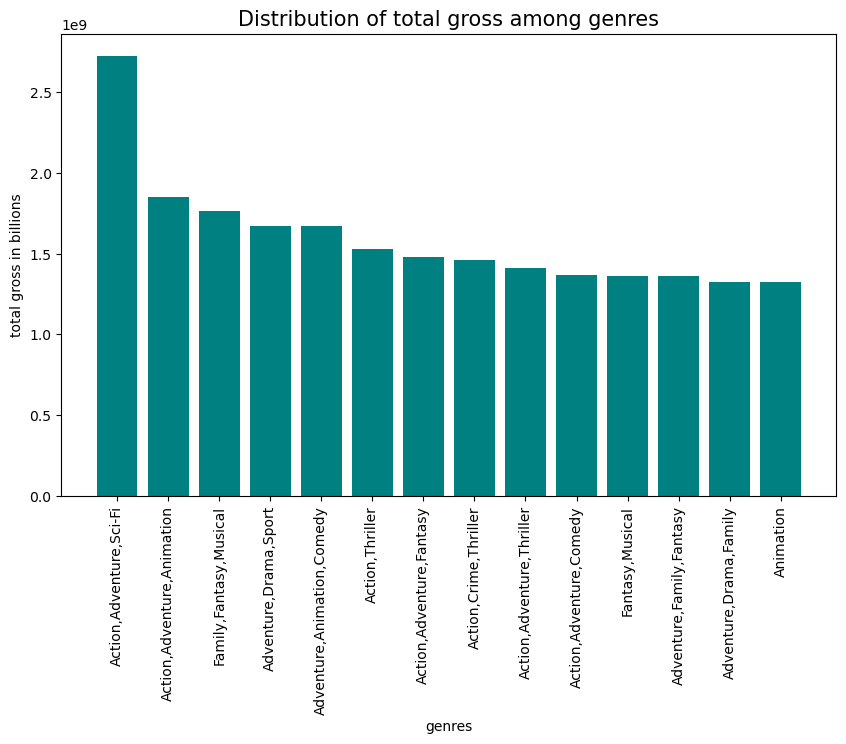

In [51]:
from distutils.dist import Distribution


fig,ax=plt.subplots(figsize=(10,6))
x=top_30_movies['genres']
y=top_30_movies['total_gross']
ax.bar(x,y,color='teal')
#customizing the bargraph
ax.set_ylim()
ax.set_ylabel('total gross in billions')
ax.set_xlabel('genres')
plt.xticks(rotation=90)
ax.set_title('Distribution of total gross among genres', fontsize=15)


### According to my analysis, which was  based on checking which genre has the highest gross value .I concluded that most movies with the highest total gross were based on Action,Adventure,Sci-Fi with a total gross of over 3 billion dollars,followed closely by Action,Adventure,Animation with aroound 2 billion dollars.The total gross was based on addin both the domestic and worldwide gross.

 ### d)Which genre has the highest production budget and is there a relationship between the production budget and the total gross

In [52]:
#most expensive genre to produce
#ordering the df by most expensive movies
top_budgets=imdb_budgets.sort_values(['production_budget'],ascending=False)
top_30_budgets=top_budgets.head(30)


Text(0.5, 1.0, 'Production budget among genres')

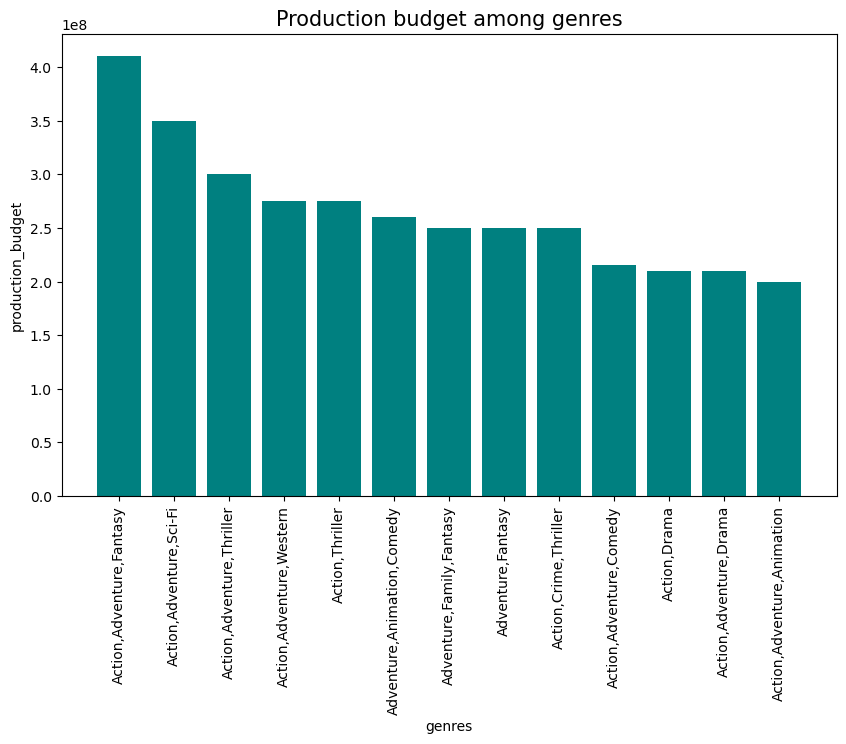

In [53]:
fig,ax=plt.subplots(figsize=(10,6))
x=top_30_budgets['genres']
y=top_30_budgets['production_budget']
ax.bar(x,y,color='teal')
#customizing the bargraph
ax.set_ylim()
ax.set_ylabel('production_budget')
ax.set_xlabel('genres')
plt.xticks(rotation=90)
ax.set_title('Production budget among genres',fontsize=15)


 ### According to my analysis, which was  based on checking which genre has the highest production .I concluded that most movies with the highest production bugdet were based on Action,Adventure,Sci-Fi with a total cost of over 4 billion dollars,followed closely by Action,Adventure,Animation with aroound 3.3 billion dollars.
 ## We can also see that Action Adventure type of  movies are the the most expensive to produce.

Text(0, 0.5, 'total gross in billions')

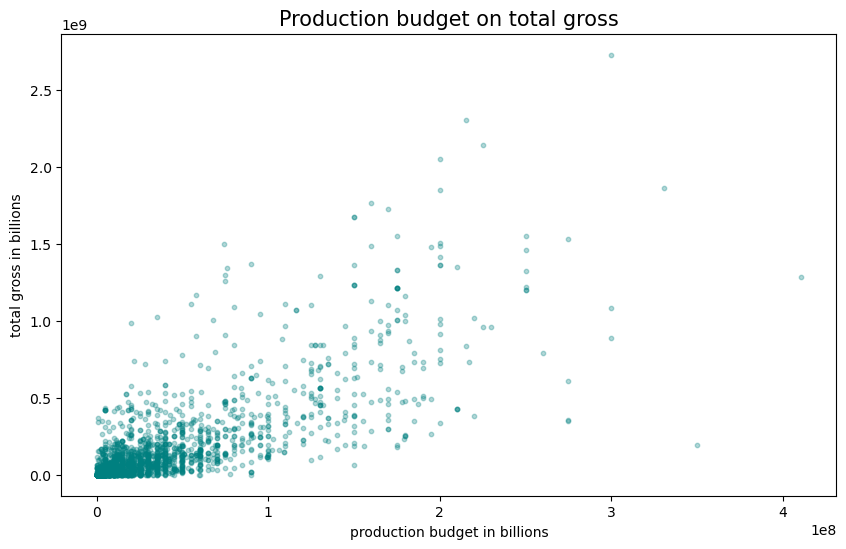

In [54]:
# relationship btn production_budget and total_gross
fig,ax=plt.subplots(figsize=(10,6))
x=imdb_budgets['production_budget']
y=imdb_budgets['total_gross']
ax.scatter(x,y,s=10, alpha=0.3,color='teal')
ax.set_title('Production budget on total gross',fontsize=15)
ax.set_xlabel('production budget in billions')
ax.set_ylabel('total gross in billions')

In [55]:
x.corr(y)

0.771556410466559

### There is a clear relationship/ a strong positive between the production cost and total gross between the movies,hence movies with a high production budget often achieves a higher  total gross

In [56]:
#extracting the month from release_date
imdb_budgets['month'] = pd.to_datetime(imdb_budgets['release_date']).dt.strftime('%B')
imdb_budgets

,movie,start_year,runtime_minutes,genres,averagerating,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,month
0,The Wall,2010,78.0,Documentary,9.2,29,"May 12, 2017",3000000,1803064,4495262,6298326,May
1,The Wall,2016,73.0,Drama,6.7,29,"May 12, 2017",3000000,1803064,4495262,6298326,May
2,The Wall,2017,88.0,"Action,Drama,Thriller",6.2,29,"May 12, 2017",3000000,1803064,4495262,6298326,May
3,Traffic,2014,110.0,Documentary,9.2,16,"Dec 27, 2000",48000000,124107476,208300000,332407476,December
4,Traffic,2011,122.0,"Action,Adventure,Mystery",8.0,16,"Dec 27, 2000",48000000,124107476,208300000,332407476,December
...,...,...,...,...,...,...,...,...,...,...,...,...
2525,Ghost,2012,118.0,Horror,2.3,5,"Jul 13, 1990",22000000,217631306,517600000,735231306,July
2526,Snow White: A Deadly Summer,2012,83.0,Horror,2.2,11,"Mar 20, 2012",1000000,0,0,0,March
2527,United Passions,2014,110.0,"Drama,History,Sport",2.1,6,"Jun 5, 2015",30000000,918,168832,169750,June
2528,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,26,"Dec 31, 2012",45000000,0,73706,73706,December


## e) Which is the best month to release  a movie in order for it to sale?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

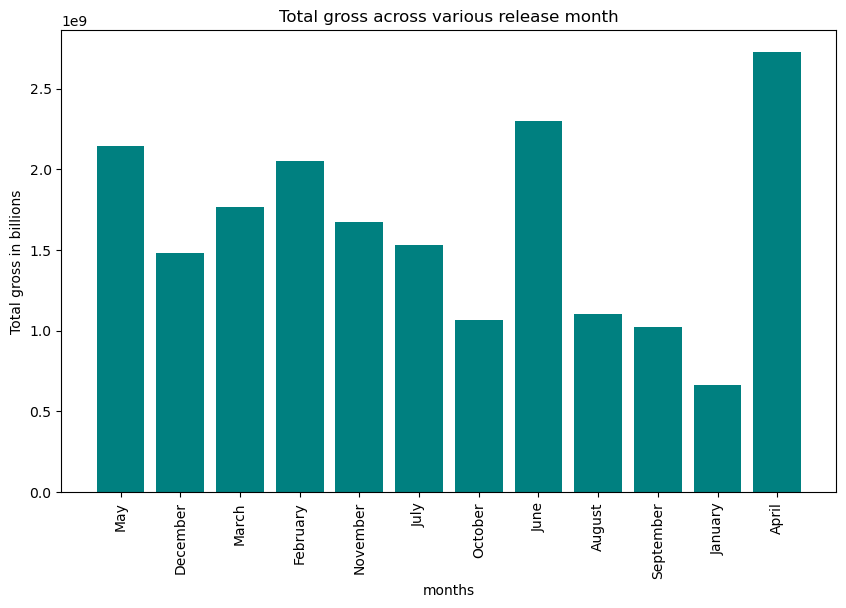

In [57]:
fig,ax=plt.subplots(figsize=(10,6))
x=imdb_budgets['month']
y=imdb_budgets['total_gross']
ax.bar(x,y,color='teal')
#customizing 
ax.set_title('Total gross across various release month')
ax.set_xlabel('months')
ax.set_ylabel('Total gross in billions')
plt.xticks(rotation=90)


### From the analysis ,our graph shows that April,June and May have the highest total gross value,hence movies released on these months garner alot of gross values

# Conclusion
## This is the summary of my analysis
### 1. Among the the top 50 movies based on the top ratings  shows that documentary is the nost rated type of genre with the high ratings and most liked by people.
### 2.There is no clear relationship between the average rating and the movie runtime ,hence concluding that  the running time of a movie does not necessarily affects its average rating
### 3.Most movies with the highest total gross were based on Action,Adventure
### 4.Action Adventure type of  movies are the the most expensive to produce.
### 5.There is a strong positive between the production cost and total gross between the movies,hence movies with a high production budget often achieves a higher  total gross
### 6. April,June and May have the highest total gross value
